
# AI7101 Machine Learning with Python-001 (2025 Fall)
# Lab 5

## TAs: Ahmed Elshabrawy, Nada Saadi

## Lab Overview

In this lab you will:
1. Explore the Kickstarter dataset and understand its features.
2. Perform different types of feature selection: manual, filter, wrapper, embedded.
3. Visualize model performance across methods.
4. Reflect on bias–variance tradeoffs.

## Setup
Install necessary libraries (uncomment if running in a clean environment), download the data from LMS (ks-projects-201801.csv)

In [1]:
# !pip install pandas scikit-learn matplotlib numpy

## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Part 0: Dataset Exploration (10 pts)

We will use the kickstarter dataset. Kickstarter is a crowdfounding platform where people announce their projects with set financial goals and others can support the projects by "pledging" some money. The goal will be to predict if the project will be successfull, i.e. would it achieve the funding goal.

### Load the dataset and select the first 10k rows only (Kickstarter, 10k rows)

In [3]:
# Pseudocode:
# data = load_data("path_to_file", nrows=100000)
# data.head(10)

#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
data= pd.read_csv("ks-projects-201801.csv.csv", nrows=100000)
data.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


### Explore dataset structure

In [4]:
# Pseudocode:
# print_shape(data)
# print_types(data)

#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
print(data.shape)
print(data.dtypes)

(100000, 15)
ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object


### Check missing values:

In [5]:
# Pseudocode:
# print(data.nul.sum)
print("\nMissing values:")
#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
print(data.isnull().sum())


Missing values:
ID                    0
name                  0
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         988
usd_pledged_real      0
usd_goal_real         0
dtype: int64


### Visualize target balance (the state column)

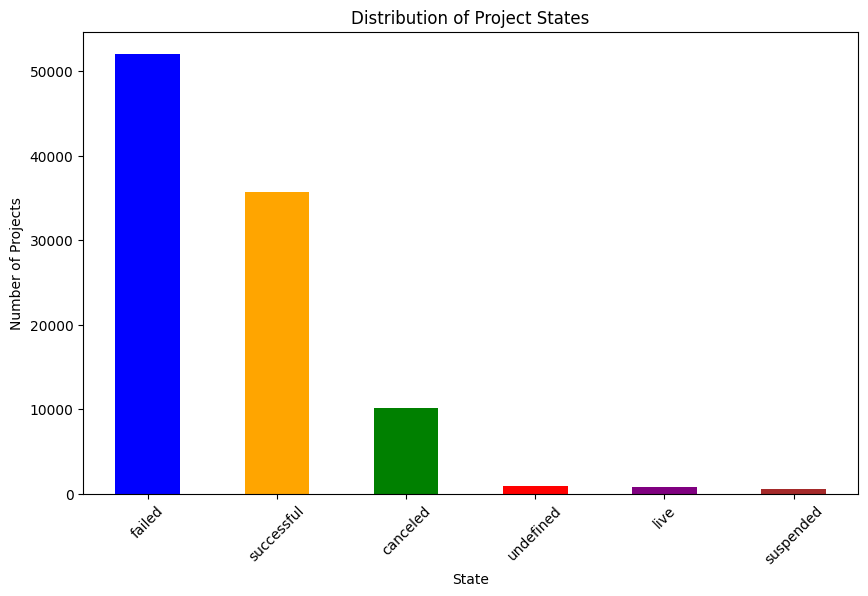

In [6]:
# Pseudocode:
# plot_bar(target_counts of the state column)

#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
target_counts = data['state'].value_counts()
plt.figure(figsize=(10, 6))
target_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Distribution of Project States')
plt.xlabel('State')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.show()

#### Why we exclude certain features:

1. 'pledged', 'usd pledged', 'usd_pledged_real': These represent the outcome!
   - They show how much money was raised
   - Using them would be "cheating" - we'd be using the result to predict itself
   
2. 'backers': Number of people who backed the project
   - This is only known AFTER the campaign runs
   - In real prediction scenarios, we wouldn't have this information
   
3. 'ID': Just an identifier, not predictive
   
4. 'name': Too specific - each project has unique name
   - Creates thousands of dummy variables (one per unique name)
   - Leads to overfitting - model memorizes specific projects
   
For this exercise, we'll focus on features that would be known BEFORE
a campaign launches.

#### Filter to only successful/failed projects for binary classification

In [7]:
df_binary = data[data['state'].isin(['successful', 'failed'])].copy() # Your Code Here
print(f"\nFiltered to binary classification: {len(df_binary)} samples")
# Create target variable
y = (df_binary['state'] == 'successful').astype(int)


Filtered to binary classification: 87710 samples


#### Handle the datetime columns

In [8]:
# Pseudocode:
# data[launched] to date time
# data[deadline] to date time

#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
df_binary['launched'] = pd.to_datetime(df_binary['launched'])
df_binary['deadline'] = pd.to_datetime(df_binary['deadline'])
print(df_binary['launched'])

0       2015-08-11 12:12:28
1       2017-09-02 04:43:57
2       2013-01-12 00:20:50
3       2012-03-17 03:24:11
5       2016-02-26 13:38:27
                ...        
99995   2012-04-30 21:33:42
99996   2016-05-10 17:01:59
99997   2014-10-18 19:02:13
99998   2016-09-29 23:56:50
99999   2016-11-27 00:08:18
Name: launched, Length: 87710, dtype: datetime64[ns]


#### Manual Feature Engineering

In [9]:
#<<<<<<<<<<<<<<< Fill in Here >>>>>>>>>>>>>>>>>>>>>
# Campaign duration (known at launch)
df_binary['campaign_days'] = (df_binary['deadline'] - df_binary['launched']).dt.days # Pseudocode: (data[deadline] - data[launched]).days
# Launch month (seasonality)
df_binary['launch_month'] = (df_binary['launched'].dt.month) # data[launched].month

# Launch year
df_binary['launch_year'] = (df_binary['launched'].dt.year) # data[laucnhed].year

print("Date features created: campaign_days, launch_month, launch_year")
print(df_binary[['campaign_days', 'launch_month', 'launch_year']].head())

Date features created: campaign_days, launch_month, launch_year
   campaign_days  launch_month  launch_year
0             58             8         2015
1             59             9         2017
2             44             1         2013
3             29             3         2012
5             34             2         2016


#### Goal amount scale by log to handle skewness

In [10]:
#<<<<<<<<<<<<<<< Fill in Here >>>>>>>>>>>>>>>>>>>>>
df_binary['log_goal'] = np.log1p(df_binary['goal']) # log(data[goal])
print("Log goal feature created")
print(df_binary['log_goal'].head())

Log goal feature created
0     6.908755
1    10.308986
2    10.714440
3     8.517393
5    10.819798
Name: log_goal, dtype: float64


#### Handle Categorical Variables Properly

In [11]:
#<<<<<<<<<<<<<<< Fill in Here >>>>>>>>>>>>>>>>>>>>>
# Main category - reasonable number of categories
print(f"Main categories: {df_binary['main_category'].nunique()} unique values")
main_cat_dummies = df_binary['main_category'].str.get_dummies() # create dummy binary columns for data[main_category]

# Currency - reasonable number
print(f"Currencies: {df_binary['currency'].nunique()} unique values")
currency_dummies = df_binary['currency'].str.get_dummies() # create dummy binary columns for data[currency]

# Country - reasonable number
print(f"Countries: {df_binary['country'].nunique()} unique values")
country_dummies = df_binary['country'].str.get_dummies() # create dummy binary columns for data[country]

# Create feature matrix
X = pd.concat([
    df_binary[['campaign_days', 'launch_month', 'launch_year', 'log_goal']],
    main_cat_dummies,
    currency_dummies,
    country_dummies
], axis=1)

print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")

Main categories: 15 unique values
Currencies: 14 unique values
Countries: 23 unique values

Final feature matrix shape: (87710, 56)
Number of features: 56


#### Handle any missing values (Hint: use median imputation)

In [12]:
#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
df_binary['usd pledged']=df_binary['usd pledged'].fillna(df_binary['usd pledged'].median())
print("\nMissing values:")
print(df_binary.isnull().sum())


Missing values:
ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
campaign_days       0
launch_month        0
launch_year         0
log_goal            0
dtype: int64


#### Split data (80/20 train/test split)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
print(f"\nTrain set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Train set size: (70168, 56)
Test set size: (17542, 56)


## Part 1: Conceptual Warm-up (20 pts)

### Q1 (5 pts): If a model includes many irrelevant features, what happens to bias and variance?
Answer (1–2 sentences): Many irrelevant features → variance increases, bias stays similar.



### Q2 (10 pts): Match each feature selection paradigm with an advantage and disadvantage.





In [15]:
# Provided options:
advantages = [
    "Fast and simple",
    "Considers feature interactions",
    "Built into the model, efficient"
]
disadvantages = [
    "Ignores interactions",
    "Computationally expensive",
    "Depends on model choice"
]

# Match answers in dictionary form: {"Filter": (adv, disadv), ...}
answers = {
    "Filter": ("Fast and simple", "Ignores interactions"),
    "Wrapper": ("Considers feature interactions", "Computationally expensive"),
    "Embedded": ("Built into the model, efficient", "Depends on model choice")
}

### Q3 (5 pts): Why can cross-validation give an optimistic estimate if feature selection is done incorrectly?
Answer (1–2 sentences):
- Because information from the test folds leaks into the model, making performance appear better than it really is.


## Part 2: Practical Feature Selection (50 pts)

In [16]:
results = {}

### 2.1 Baseline Model (10 pts)

#### Train logistic regression on all features

In [17]:
# Pseudocode:
# model = build_logistic_regression()
# fit_model(model, X_train, y_train)
# train_acc_base, test_acc_base = evaluate_model(model, X_test, y_test)

#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
from sklearn.pipeline import make_pipeline
clf=make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))
model=clf.fit(X_train,y_train)
train_acc_base = model.score(X_train, y_train)
test_acc_base = model.score(X_test, y_test)


#<<<<<<<<<<<<<<< End >>>>>>>>>>>>>>>>>>>>>

print(f"Number of features: {X_train.shape[1]}")
print(f"Training accuracy: {train_acc_base:.4f}")
print(f"Testing accuracy: {test_acc_base:.4f}")
print(f"Overfitting gap: {(train_acc_base - test_acc_base):.4f}")

results['Baseline (All)'] = {'train': train_acc_base, 'test': test_acc_base, 'n_features': X_train.shape[1]}

Number of features: 56
Training accuracy: 0.6475
Testing accuracy: 0.6502
Overfitting gap: -0.0028


### 2.2 Manual Feature Selection (10 pts)
#### Based on your exploration in Part 0, choose 2 features you think matter most.

In [18]:
manual_features = ['campaign_days', 'log_goal']

print(f"Selected features: {manual_features}")

Selected features: ['campaign_days', 'log_goal']


#### Train a logistic regression on chosen features

In [19]:
# Pseudocode:
# model = build_logistic_regression()
# fit_model(model, X_train[chosen_features], y_train)
# train_acc_manual, test_acc_manual = evaluate_model(model, X_test[chosen_features], y_test)

#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
clf=make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))
model=clf.fit(X_train[manual_features],y_train)
train_acc_manual = model.score(X_train[manual_features], y_train)
test_acc_manual = model.score(X_test[manual_features], y_test)


#<<<<<<<<<<<<<<< End >>>>>>>>>>>>>>>>>>>>>


print(f"Number of features: {len(manual_features)}")
print(f"Training accuracy: {train_acc_manual:.4f}")
print(f"Testing accuracy: {test_acc_manual:.4f}")
print(f"Overfitting gap: {(train_acc_manual - test_acc_manual):.4f}")

results['Manual'] = {'train': train_acc_manual, 'test': test_acc_manual, 'n_features': len(manual_features)}

Number of features: 2
Training accuracy: 0.6141
Testing accuracy: 0.6110
Overfitting gap: 0.0031


### 2.3 Filter Methods (10 pts)
#### Use univariate tests to keep top 10 features

In [20]:
# Pseudocode:
# selected = select_k_best(X_train, y_train, k=10)
# fit_model(model, X_train[selected], y_train)
# train_acc_filter, test_acc_filter = evaluate_model(model, X_test[selected], y_test)

#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
selected = SelectKBest(score_func=f_classif, k=10).fit(X_train, y_train).get_support(indices=True)
selected_features = X_train.columns[selected]
clf=make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))
model=clf.fit(X_train[selected_features],y_train)
train_acc_filter = model.score(X_train[selected_features], y_train)
test_acc_filter = model.score(X_test[selected_features], y_test)


#<<<<<<<<<<<<<<< End >>>>>>>>>>>>>>>>>>>>>

print(f"Number of features: 10")
print(f"Training accuracy: {train_acc_filter:.4f}")
print(f"Testing accuracy: {test_acc_filter:.4f}")
print(f"Overfitting gap: {(train_acc_filter - test_acc_filter):.4f}")

results['Filter (K=10)'] = {'train': train_acc_filter, 'test': test_acc_filter, 'n_features': 10}

Number of features: 10
Training accuracy: 0.6388
Testing accuracy: 0.6381
Overfitting gap: 0.0007


### 2.4 Wrapper (RFE) (10 pts)
#### Use recursive feature elimination to select 10 features

In [21]:
# Pseudocode:
# selected = recursive_feature_elimination(model, X_train, y_train, n=10)
# train_acc_wrapper,test_acc_wrapper = evaluate_model(model, X_test[selected], y_test)

#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
# The subsequent training uses the "normalization + logistic regression" pipeline.
# For consistency and more stable convergence, so normalize the data first, and then perform RFE. And RFE cannot directly include Pipeline.

X_train_t=StandardScaler().fit_transform(X_train)
selected = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10).fit(X_train_t, y_train).get_support(indices=True)
selected_features = X_train.columns[selected]
lr_wrapper = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000)).fit(X_train[selected_features],y_train)
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]


#<<<<<<<<<<<<<<< End >>>>>>>>>>>>>>>>>>>>>

train_acc_wrapper = lr_wrapper.score(X_train_rfe, y_train)
test_acc_wrapper = lr_wrapper.score(X_test_rfe, y_test)

print(f"Number of features: 10")
print(f"Training accuracy: {train_acc_wrapper:.4f}")
print(f"Testing accuracy: {test_acc_wrapper:.4f}")
print(f"Overfitting gap: {(train_acc_wrapper - test_acc_wrapper):.4f}")

results['Wrapper (RFE)'] = {'train': train_acc_wrapper, 'test': test_acc_wrapper, 'n_features': 10}

Number of features: 10
Training accuracy: 0.6379
Testing accuracy: 0.6403
Overfitting gap: -0.0024


### 2.5 Embedded (L1 Logistic Regression) (10 pts)
#### Train logistic regression with L1 penalty

In [22]:
 # Pseudocode:
# l1_model = build_l1_logistic_regression()
# fit_model(l1_model, X_train, y_train)
# number_nonzero, nonzero_features = count_find_nonzero_coefficients(l1_model)
# train_acc_l1, test_acc_l1 = evaluate_model(l1_model, X_test, y_test)

# Scale features for L1 regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
l1_model = LogisticRegression(penalty='l1', solver='saga', max_iter=5000)
l1_model.fit(X_train_scaled, y_train)

non_zero_coef = np.sum(l1_model.coef_ != 0)
non_zero_features = X_train.columns[(l1_model.coef_ != 0).flatten()]
train_acc_l1 = l1_model.score(X_train_scaled, y_train)
test_acc_l1 = l1_model.score(X_test_scaled, y_test)


#<<<<<<<<<<<<<<< End >>>>>>>>>>>>>>>>>>>>>


print(f"Number of non-zero features: {non_zero_coef}")
print(f"Non-zero features: {non_zero_features[:5]}... (showing first 5)")
print(f"Training accuracy: {train_acc_l1:.4f}")
print(f"Testing accuracy: {test_acc_l1:.4f}")
print(f"Overfitting gap: {(train_acc_l1 - test_acc_l1):.4f}")

results['L1 Embedded'] = {'train': train_acc_l1, 'test': test_acc_l1, 'n_features': non_zero_coef}


Number of non-zero features: 53
Non-zero features: Index(['campaign_days', 'launch_month', 'launch_year', 'log_goal', 'Art'], dtype='object')... (showing first 5)
Training accuracy: 0.6475
Testing accuracy: 0.6501
Overfitting gap: -0.0026


### 2.6 Bias–Variance Comparison with Decision Trees (10 pts)
#### Train shallow and deep trees

In [23]:
# Pseudocode:
# shallow_tree = build_decision_tree(depth=3)
# deep_tree = build_decision_tree()
# fit both, evaluate train/test

# Shallow tree (high bias, low variance)

#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow_tree.fit(X_train, y_train)
train_acc_shallow = shallow_tree.score(X_train, y_train)
test_acc_shallow = shallow_tree.score(X_test, y_test)


#<<<<<<<<<<<<<<< End >>>>>>>>>>>>>>>>>>>>>

print("Shallow Tree (max_depth=3):")
print(f"Training accuracy: {train_acc_shallow:.4f}")
print(f"Testing accuracy: {test_acc_shallow:.4f}")
print(f"Overfitting gap: {(train_acc_shallow - test_acc_shallow):.4f}")

# Deep tree (low bias, high variance)

#<<<<<<<<<<<<<<< Your Code Here >>>>>>>>>>>>>>>>>>>>>
deep_tree = DecisionTreeClassifier(max_depth=20, random_state=42)
deep_tree.fit(X_train, y_train)
train_acc_deep = deep_tree.score(X_train, y_train)
test_acc_deep = deep_tree.score(X_test, y_test)


#<<<<<<<<<<<<<<< End >>>>>>>>>>>>>>>>>>>>>

print("\nDeep Tree (max_depth=20):")
print(f"Training accuracy: {train_acc_deep:.4f}")
print(f"Testing accuracy: {test_acc_deep:.4f}")
print(f"Overfitting gap: {(train_acc_deep - test_acc_deep):.4f}")

results['Shallow Tree'] = {'train': train_acc_shallow, 'test': test_acc_shallow, 'n_features': X_train.shape[1]}
results['Deep Tree'] = {'train': train_acc_deep, 'test': test_acc_deep, 'n_features': X_train.shape[1]}

Shallow Tree (max_depth=3):
Training accuracy: 0.6247
Testing accuracy: 0.6243
Overfitting gap: 0.0003

Deep Tree (max_depth=20):
Training accuracy: 0.8163
Testing accuracy: 0.6209
Overfitting gap: 0.1954


### Visualizations

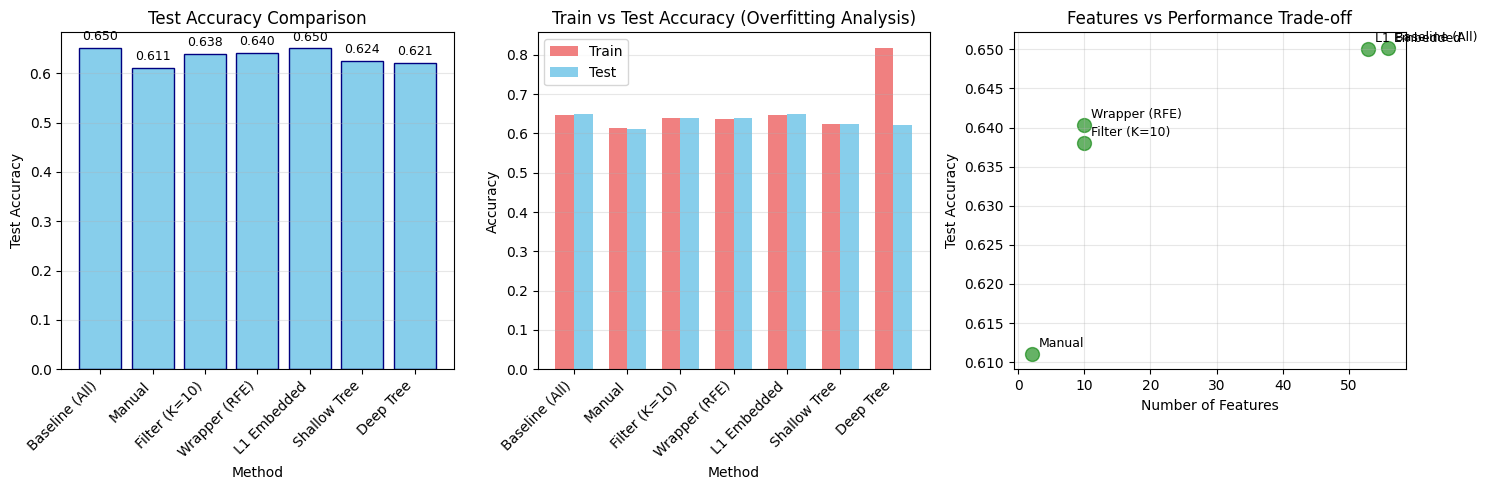

In [24]:
# Create comparison plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Test Accuracies
methods = list(results.keys())
test_accs = [results[m]['test'] for m in methods]
train_accs = [results[m]['train'] for m in methods]
n_features = [results[m]['n_features'] for m in methods]

ax1 = axes[0]
x_pos = np.arange(len(methods))
bars = ax1.bar(x_pos, test_accs, color='skyblue', edgecolor='navy')
ax1.set_xlabel('Method')
ax1.set_ylabel('Test Accuracy')
ax1.set_title('Test Accuracy Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(methods, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, test_accs)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{val:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Train vs Test (Overfitting Analysis)
ax2 = axes[1]
width = 0.35
x_pos = np.arange(len(methods))
bars1 = ax2.bar(x_pos - width/2, train_accs, width, label='Train', color='lightcoral')
bars2 = ax2.bar(x_pos + width/2, test_accs, width, label='Test', color='skyblue')
ax2.set_xlabel('Method')
ax2.set_ylabel('Accuracy')
ax2.set_title('Train vs Test Accuracy (Overfitting Analysis)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(methods, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Number of Features vs Test Accuracy
ax3 = axes[2]
# Only plot methods with different feature counts
unique_methods = ['Manual', 'Filter (K=10)', 'Wrapper (RFE)', 'L1 Embedded', 'Baseline (All)']
unique_n_features = [results[m]['n_features'] for m in unique_methods]
unique_test_accs = [results[m]['test'] for m in unique_methods]

ax3.scatter(unique_n_features, unique_test_accs, s=100, alpha=0.6, color='green')
for i, txt in enumerate(unique_methods):
    ax3.annotate(txt, (unique_n_features[i], unique_test_accs[i]),
                 fontsize=9, xytext=(5,5), textcoords='offset points')
ax3.set_xlabel('Number of Features')
ax3.set_ylabel('Test Accuracy')
ax3.set_title('Features vs Performance Trade-off')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part 3: Wrap-up Reflections (20 pts)

### Q1 (10 pts): If you had to deploy this model on a low-resource device, which feature selection method would you choose and why?
Your answer here: 
- Embedded method like L1 regularization -> L1 regularization naturally drives many coefficients to exactly zero, leaving only the most important features, which reduces both storage and computational cost.

### Q2 (10 pts): For the deep and shallow tree in Part 2: Explain why their accuracies differed in terms of bias vs variance.
Your answer here: 
- SDT cannot capture complex decision boundaries, and underfits the data, leading to lower accuracy on both training and test sets.
- DDT(deep dt) can perfectly fit the training data, leading to very low training error, but tends to overfit noise, leading to lower accuracy on the test set. 

## Summary

In [25]:
# Final Summary Table
print("\n" + "="*50)
print("FINAL SUMMARY TABLE")
print("="*50)

summary_df = pd.DataFrame({
    'Method': methods,
    'N_Features': n_features,
    'Train_Acc': train_accs,
    'Test_Acc': test_accs,
    'Overfit_Gap': [train_accs[i] - test_accs[i] for i in range(len(train_accs))]
})

summary_df = summary_df.sort_values('Test_Acc', ascending=False)
print(summary_df.to_string(index=False))


FINAL SUMMARY TABLE
        Method  N_Features  Train_Acc  Test_Acc  Overfit_Gap
Baseline (All)          56   0.647460  0.650211    -0.002751
   L1 Embedded          53   0.647475  0.650097    -0.002622
 Wrapper (RFE)          10   0.637869  0.640292    -0.002423
 Filter (K=10)          10   0.638753  0.638069     0.000684
  Shallow Tree          56   0.624672  0.624330     0.000342
     Deep Tree          56   0.816270  0.620853     0.195417
        Manual           2   0.614112  0.611048     0.003064
